# Spotify Machine Learning

In [1]:
# Libraries

%matplotlib inline

import json

import pandas as pd
from pandas.io.json import json_normalize

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
# Import JSON files

with open("top_tracks_attributes.json") as f:
    top_tracks_json = json.load(f)
    
with open("rap_tracks.json") as f:
    genre_tracks_json = json.load(f)
    
top_tracks = json_normalize(top_tracks_json)
top_tracks['rank'] = range(1, len(top_tracks) + 1)

genre_tracks = json_normalize(genre_tracks_json)

## Characteristics to Analyze

1. acousticness
2. danceability
3. energy
4. instrumentalness
5. liveness
6. loudness
7. speechiness
8. valence

Predicting: rank

Assume all attributes of are equal weight initially.

In [3]:
train = top_tracks.sample(frac=.8)
test = top_tracks.drop(train.index)

In [4]:
train

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,rank
6,0.012500,https://api.spotify.com/v1/audio-analysis/7f0v...,0.522,245960,0.9230,7f0vVL3xi4i78Rv5Ptn2s1,0.017000,2,0.0854,-4.560,1,0.0539,170.057,4,https://api.spotify.com/v1/tracks/7f0vVL3xi4i7...,audio_features,spotify:track:7f0vVL3xi4i78Rv5Ptn2s1,0.5950,7
43,0.305000,https://api.spotify.com/v1/audio-analysis/66YH...,0.315,216800,0.2180,66YHxyGAUGjMBDdrDlWIMD,0.001200,0,0.2260,-15.215,1,0.0731,175.861,4,https://api.spotify.com/v1/tracks/66YHxyGAUGjM...,audio_features,spotify:track:66YHxyGAUGjMBDdrDlWIMD,0.1560,44
30,0.002550,https://api.spotify.com/v1/audio-analysis/2aoo...,0.438,240800,0.8050,2aoo2jlRnM3A0NyLQqMN2f,0.000057,8,0.0842,-6.237,1,0.0624,113.253,4,https://api.spotify.com/v1/tracks/2aoo2jlRnM3A...,audio_features,spotify:track:2aoo2jlRnM3A0NyLQqMN2f,0.5640,31
25,0.059100,https://api.spotify.com/v1/audio-analysis/1tDW...,0.359,130429,0.5790,1tDWVeCR9oWGX8d5J9rswk,0.746000,10,0.0686,-10.765,1,0.0406,68.102,4,https://api.spotify.com/v1/tracks/1tDWVeCR9oWG...,audio_features,spotify:track:1tDWVeCR9oWGX8d5J9rswk,0.1350,26
42,0.001400,https://api.spotify.com/v1/audio-analysis/0OUQ...,0.370,211827,0.9010,0OUQhRKgGSb0PPrLUuEQka,0.000000,6,0.2500,-3.393,0,0.0500,167.995,4,https://api.spotify.com/v1/tracks/0OUQhRKgGSb0...,audio_features,spotify:track:0OUQhRKgGSb0PPrLUuEQka,0.4010,43
0,0.521000,https://api.spotify.com/v1/audio-analysis/3TO7...,0.358,413947,0.4800,3TO7bbrUKrOSPGRTB5MeCz,0.004280,9,0.1780,-11.790,1,0.0849,120.317,4,https://api.spotify.com/v1/tracks/3TO7bbrUKrOS...,audio_features,spotify:track:3TO7bbrUKrOSPGRTB5MeCz,0.3560,1
22,0.048300,https://api.spotify.com/v1/audio-analysis/086m...,0.691,161124,0.6310,086myS9r57YsLbJpU0TgK9,0.000011,2,0.1040,-6.478,1,0.0368,92.004,4,https://api.spotify.com/v1/tracks/086myS9r57Ys...,audio_features,spotify:track:086myS9r57YsLbJpU0TgK9,0.8000,23
48,0.031100,https://api.spotify.com/v1/audio-analysis/2jt2...,0.939,337941,0.5510,2jt2WxXMCD4zjACthkJQVE,0.000000,1,0.1920,-9.126,1,0.2910,118.552,4,https://api.spotify.com/v1/tracks/2jt2WxXMCD4z...,audio_features,spotify:track:2jt2WxXMCD4zjACthkJQVE,0.4200,49
1,0.150000,https://api.spotify.com/v1/audio-analysis/5HNC...,0.472,382297,0.3660,5HNCy40Ni5BZJFw1TKzRsC,0.308000,11,0.0837,-12.595,0,0.0286,127.167,4,https://api.spotify.com/v1/tracks/5HNCy40Ni5BZ...,audio_features,spotify:track:5HNCy40Ni5BZJFw1TKzRsC,0.1710,2
24,0.697000,https://api.spotify.com/v1/audio-analysis/1UMX...,0.410,318846,0.3700,1UMXtudajhlocMzXVSngDU,0.000144,4,0.2110,-15.757,0,0.0766,76.926,4,https://api.spotify.com/v1/tracks/1UMXtudajhlo...,audio_features,spotify:track:1UMXtudajhlocMzXVSngDU,0.3300,25


In [5]:
X_train = train[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_train = train['rank']
X_test = test[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y_test = test['rank']

## Find Optimal K-Value

In [6]:
def get_Kneighbors_test_error(k):
    scaler = StandardScaler()
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([('transform', scaler), ('fit', model)])
    return np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

In [7]:
ks = pd.Series(range(1, 30, 1))
ks.index = ks

k_cross_val = ks.apply(get_Kneighbors_test_error)

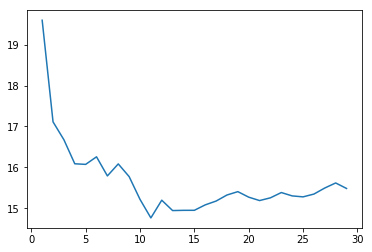

In [8]:
k_cross_val.plot()
k = k_cross_val.idxmin()

## K-nearest Neighbors Analysis

In [9]:
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors= k)
pipeline = Pipeline([('transform', scaler), ('fit', model)])
np.sqrt(np.abs(cross_val_score(pipeline, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean()))

14.761891130612844

In [10]:
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
y_test_pred

array([20.45454545, 27.72727273, 20.45454545, 20.45454545, 20.45454545,
       20.45454545, 20.45454545, 27.54545455, 24.27272727, 25.27272727])

In [11]:
genre_test = genre_tracks[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]

In [12]:
ranked_indices = genre_test.join(pd.Series(model.predict(genre_test)).rename("predicted_rank")).sort_values("predicted_rank").index.tolist()

In [13]:
genre_tracks.loc[ranked_indices, 'id'].tolist()

['4UW4GsTVETXP2mzXfMT2iC',
 '26jYPsHHSOxCTz4cLt6SbQ',
 '2OsDoAzo5SGq10qwmKSQBv',
 '1B3TX5FbmcVROMv2riOwyE',
 '3aGibUHhQyBsyumYHylw0K',
 '6JQvHMSaR8flFsN53ypOfP',
 '2GyHLJ238fZx2QkQO9v7nV',
 '3lb5fWSG2p7x8ik8HN9oFR',
 '1iPBD72u3nAyFEeardYuBV',
 '00B7TZ0Xawar6NZ00JFomN',
 '50a8bKqlwDEqeiEknrzkTO',
 '6HfOzLLjsaXsehIFEsrxTk',
 '32xx0fAv3CIeGmNaWTHvEF',
 '2qfWkO1ZRcSdeHb1Cb3xIi',
 '5tFep7dXGd7vEJ668wTPux',
 '3xKsf9qdS1CyvXSMEid6g8',
 '5ocuRCDSWiUMZcWI4Utd9g',
 '4qKcDkK6siZ7Jp1Jb4m0aL',
 '5R2rsbwCDXORX2tLfprRmM',
 '0ua0Go4NN4Td7l0Zre6Ce3',
 '2pg2TiYo9Rb8KeB5JjP7jS',
 '106VtwWCZbr6LyBiPT4Qmn',
 '5XAPpyIoYF3QXP34Hv8Pvx',
 '6PGoSes0D9eUDeeAafB2As',
 '6QFzUXTIZXOLesQcgmGOsR',
 '3ZhTT6yjZwpPph5MIJ53XY',
 '6H0AwSQ20mo62jGlPGB8S6',
 '7MXVkk9YMctZqd1Srtv4MB',
 '27oFpFktCq9JIXjJQRuv7a',
 '6tFWMs2FJMi4loy4XlR8bz',
 '465mhRDuwxjrJ61UrvRvrZ',
 '3rZhRBdVQ2fTEM2ULOAwUL',
 '30Zcjs7pgEkmJA1lEbGSWT',
 '5gQcxYXqnofyocKgEbGYKt',
 '5lar0mCUejpILVkAz50s2J',
 '2u7mxWSeoqTXndK5e08jMp',
 '3jGYpYY6jm48GArqKDnuwG',
 